In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Housing.csv')

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.loc[data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [8]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

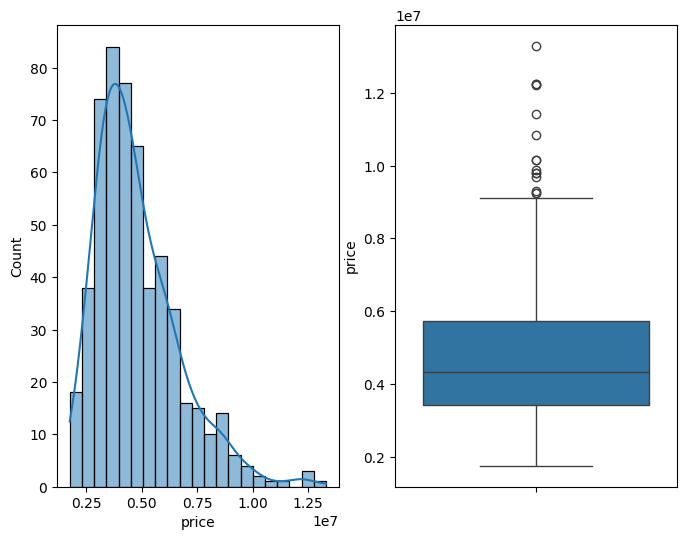

In [11]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.histplot(data['price'],kde=True)

# plt.figure(figsize=(8,6))
plt.subplot(1,2,2)
sns.boxplot(data['price'])
plt.show()

In [12]:
list_col = [data.columns]
print(list_col)

[Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')]


In [13]:
category_col=[x for x in data.columns if data[x].dtype=="object"]
category_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [14]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
categorical_col=[x for x in data.columns if data[x].dtype=='object']
categorical_col

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

<Axes: title={'center': 'mainroad'}, xlabel='mainroad'>

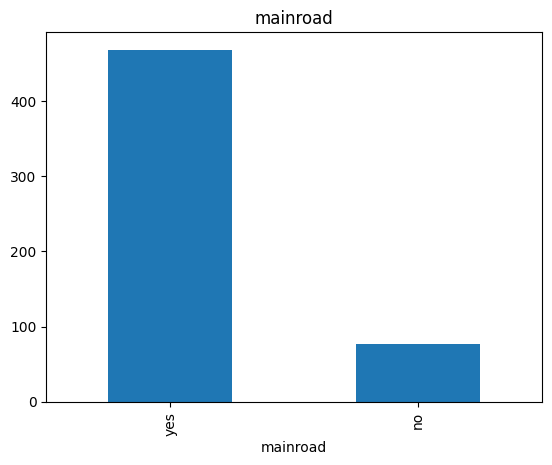

In [16]:
# sns.barplot(x=data['mainroad'].count())
data['mainroad'].value_counts().plot(kind='bar',title='mainroad')

In [17]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
# y=data['price']
# x=data.drop('price',axis=1)

In [19]:
rdf=data.copy()

In [20]:
def col_replace(a,col):
   a[col]= a[col].apply(lambda x: 1 if x =='yes' else 0)

In [21]:
col_replace(rdf,"mainroad")
col_replace(rdf,"guestroom")
col_replace(rdf,"basement")
col_replace(rdf,"hotwaterheating")
col_replace(rdf,"airconditioning")
col_replace(rdf,"prefarea")

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [24]:
rdf['furnishingstatus']=encoder.fit_transform(rdf['furnishingstatus'])

In [25]:
rdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [26]:
y=rdf['price']
x=rdf.drop('price',axis=1)

In [27]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=42)

In [30]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
70,4000,3,2,2,1,0,1,0,1,0,1,1
398,3120,3,1,2,1,0,0,0,0,1,0,2
79,6000,3,2,3,1,1,0,0,1,0,0,0
483,6615,3,1,2,1,0,0,0,0,0,0,1
429,4775,4,1,2,1,0,0,0,0,0,0,2


In [31]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
# standardizing data of train
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [34]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [35]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [36]:
mse

array([-1.02568072e+12, -1.88905115e+12, -9.89255316e+11, -1.63586487e+12,
       -7.18500213e+11, -6.62511828e+11, -5.69896232e+11, -1.74215891e+12,
       -8.95397247e+11, -1.42365876e+12])

In [37]:
np.mean(mse)

np.float64(-1155197524039.9644)

In [38]:
pred=regression.predict(x_test)

In [39]:
pred

array([5126310.83528489, 7238462.49204621, 3001100.34910869,
       4594192.96025524, 3328155.44809387, 3518520.43979604,
       5719878.22895944, 6507154.98516084, 2849533.62869096,
       2626362.32339845, 9630680.24892768, 2756628.31300753,
       3104144.10327421, 3277476.60102105, 3669883.90288958,
       5301257.99450628, 2973161.88525043, 4872129.00091409,
       4369204.90544436, 3449096.90538485, 5863659.97945331,
       5918745.26915305, 2691485.95661023, 4904807.00938782,
       5238892.14199075, 7441307.63389236, 3301019.89023537,
       5318752.37254711, 8177966.29620868, 3421975.2077347 ])

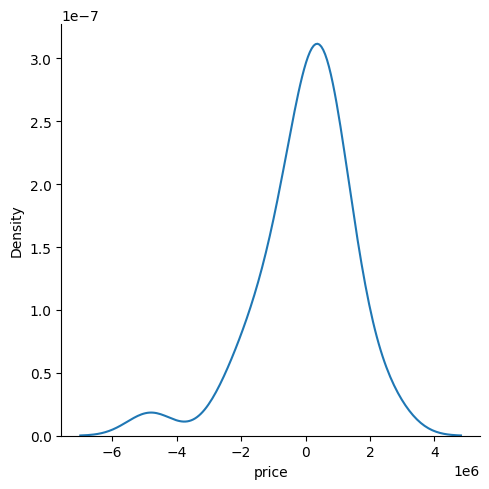

In [40]:
import seaborn as sns
sns.displot(pred-y_test,kind='kde')

In [41]:
from sklearn.metrics import r2_score
score=r2_score(pred,y_test)
score

0.36705584515116574